# California housing prices

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
dataset = pd.read_csv('housing.csv')

## Dataset description

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
dataset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [43]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
dataset.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [12]:
dataset[dataset['ocean_proximity'] == 'INLAND']['median_income'].mean()

3.2089963822317205

In [44]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [45]:
dataset['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

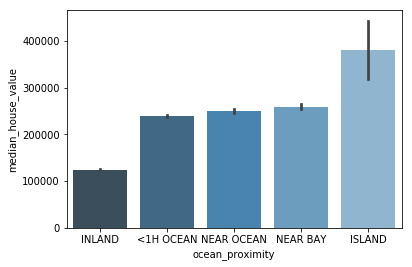

In [49]:
sns.barplot(x = 'ocean_proximity', y = 'median_house_value', data = dataset, palette="Blues_d", 
           order=["INLAND", "<1H OCEAN", "NEAR OCEAN", "NEAR BAY", "ISLAND"])

Houses on the island have the highest median value, but there are only 5 houses located on the island. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AD41542128>,
      dtype=object)

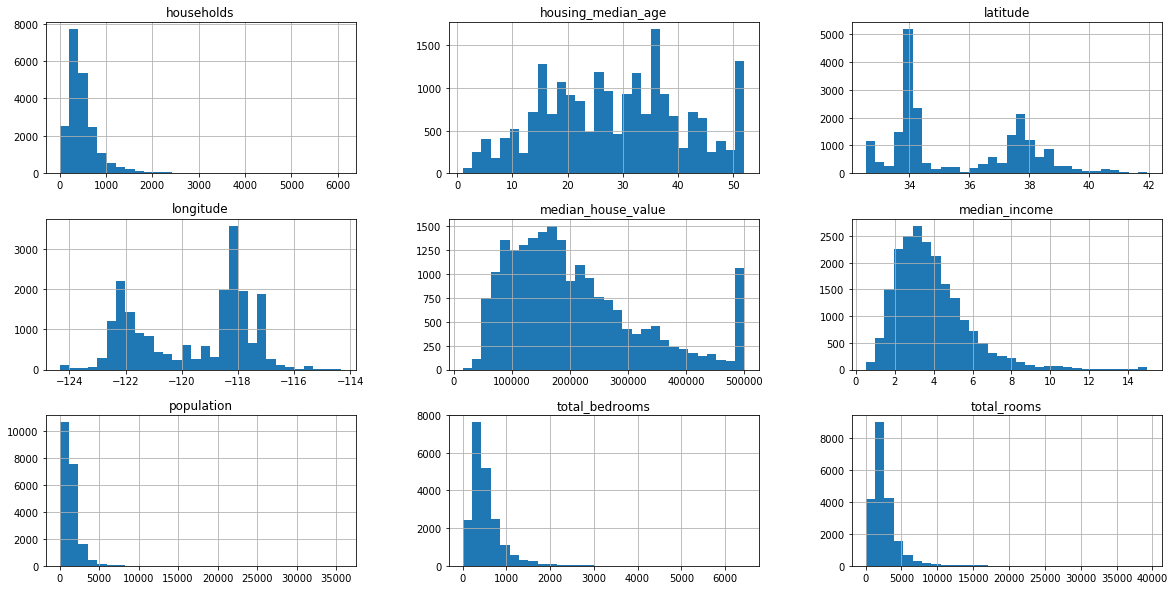

In [50]:
dataset.hist(bins = 30, figsize = (20,10))

## Detecting outliers - Three Sigma Rule

Distributions of numerical variables are skewed (see histograms above). One of the solutions to get rid of skewness is to detect and then replace outliers with median values. For detecting outliers we can use the common method called the 'Three sigma method'. 

In [51]:
#Detecting outliers with three sigma method 
#Imputing outliers using median value

def median_imputation(df, field_name):
    for i in df[field_name]:
        upper_tail = (df[field_name].mean() + 3 * df[field_name].std())
        lower_tail = (df[field_name].mean() - 3 * df[field_name].std())
        if i > upper_tail or i < lower_tail:
            df[field_name] = df[field_name].replace(i, np.median(df[field_name]))

In [52]:
dataset.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [53]:
median_imputation(dataset, 'housing_median_age')
median_imputation(dataset, 'total_rooms')
median_imputation(dataset, 'total_bedrooms')
median_imputation(dataset, 'population')
median_imputation(dataset, 'households')
median_imputation(dataset, 'median_income')
median_imputation(dataset, 'median_house_value')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AD40667D68>,
      dtype=object)

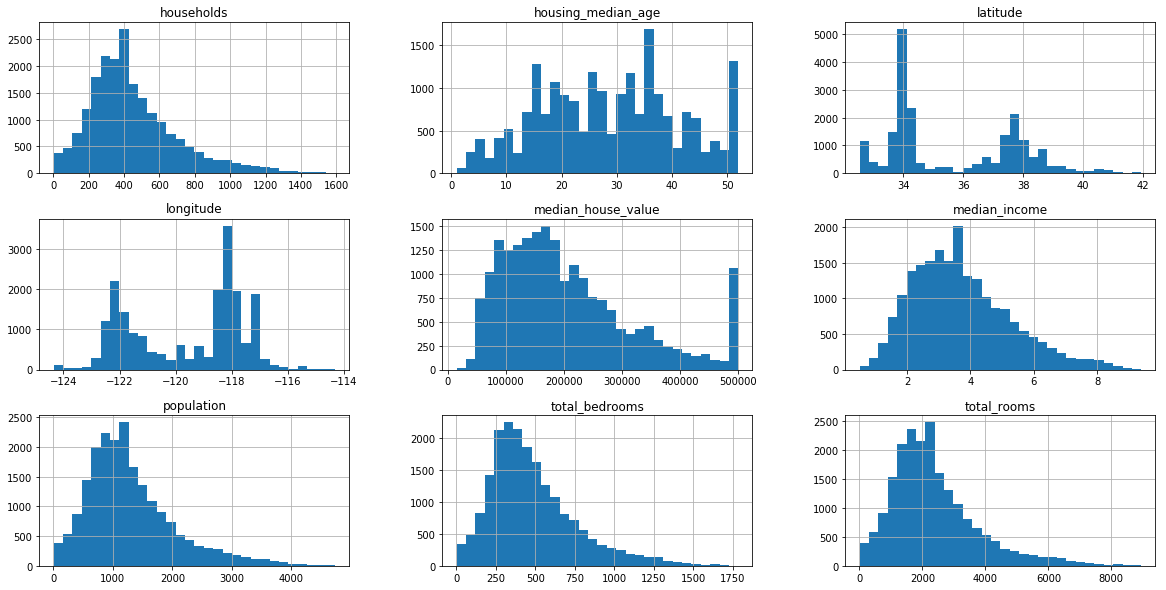

In [32]:
#Plotting histograms after imputation
dataset.hist(bins = 30, figsize = (20,10))

## Log transformation to reduce skewness

The next step in reducing skewness is a logarithmic transformation. 

In [56]:
field_names = ['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']
for field_name in field_names:
    dataset[field_name] = np.log(dataset[field_name] + 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AD44BB9668>,
      dtype=object)

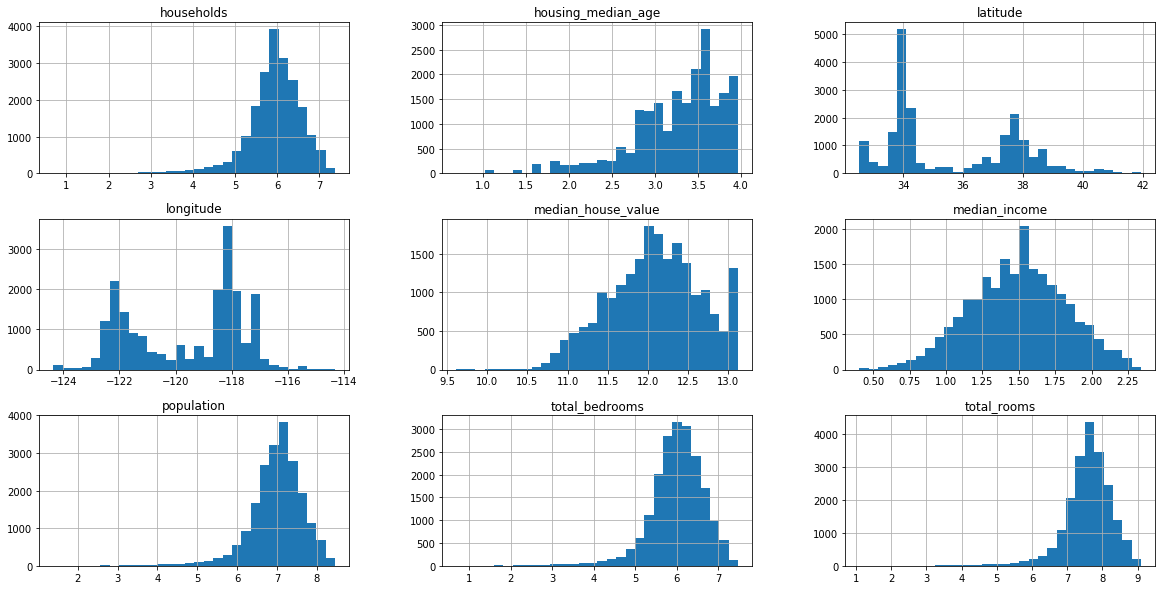

In [57]:
dataset.hist(bins = 30, figsize = (20,10))

## Filling null values

In [58]:
dataset["total_bedrooms"].fillna(dataset["total_bedrooms"].median(), inplace = True)

In [59]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Endoding categorical variable

As many of the numerical regression methods demand numerical variables as an input, we need to encode the categorical variable - 'ocean proximity'.

In [60]:
dataset['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [61]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,3.737670,6.781058,4.867534,5.777652,4.844187,2.232720,13.022766,NEAR BAY
1,-122.22,37.86,3.091042,8.867850,7.009409,7.784057,7.037906,2.230165,12.789687,NEAR BAY
2,-122.24,37.85,3.970292,7.291656,5.252273,6.208590,5.181784,2.111110,12.771673,NEAR BAY
3,-122.25,37.85,3.970292,7.150701,5.463832,6.326149,5.393628,1.893579,12.740520,NEAR BAY
4,-122.25,37.85,3.970292,7.395108,5.638355,6.338594,5.560682,1.578195,12.743154,NEAR BAY


In [213]:
dataset.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [62]:
#Splitting dataset into X and y 
X = dataset.drop(['median_house_value'], axis = 1)
y = dataset['median_house_value']
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,3.737670,6.781058,4.867534,5.777652,4.844187,2.232720,NEAR BAY
1,-122.22,37.86,3.091042,8.867850,7.009409,7.784057,7.037906,2.230165,NEAR BAY
2,-122.24,37.85,3.970292,7.291656,5.252273,6.208590,5.181784,2.111110,NEAR BAY
3,-122.25,37.85,3.970292,7.150701,5.463832,6.326149,5.393628,1.893579,NEAR BAY
4,-122.25,37.85,3.970292,7.395108,5.638355,6.338594,5.560682,1.578195,NEAR BAY


In [63]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,3.737670,6.781058,4.867534,5.777652,4.844187,2.232720,NEAR BAY
1,-122.22,37.86,3.091042,8.867850,7.009409,7.784057,7.037906,2.230165,NEAR BAY
2,-122.24,37.85,3.970292,7.291656,5.252273,6.208590,5.181784,2.111110,NEAR BAY
3,-122.25,37.85,3.970292,7.150701,5.463832,6.326149,5.393628,1.893579,NEAR BAY
4,-122.25,37.85,3.970292,7.395108,5.638355,6.338594,5.560682,1.578195,NEAR BAY


In [64]:
pd.get_dummies(X['ocean_proximity'], ).head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [65]:
X = pd.concat([X, pd.get_dummies(X['ocean_proximity']) ], axis = 1)

In [66]:
X.drop(['ocean_proximity'], axis = 1, inplace = True)

In [67]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,3.737670,6.781058,4.867534,5.777652,4.844187,2.232720,0,0,0,1,0
1,-122.22,37.86,3.091042,8.867850,7.009409,7.784057,7.037906,2.230165,0,0,0,1,0
2,-122.24,37.85,3.970292,7.291656,5.252273,6.208590,5.181784,2.111110,0,0,0,1,0
3,-122.25,37.85,3.970292,7.150701,5.463832,6.326149,5.393628,1.893579,0,0,0,1,0
4,-122.25,37.85,3.970292,7.395108,5.638355,6.338594,5.560682,1.578195,0,0,0,1,0


## Correlation matrix

In [68]:
corr_matrix = dataset.corr()

In [69]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.635144
total_rooms           0.181778
households            0.109194
total_bedrooms        0.083529
housing_median_age    0.050307
population            0.025679
longitude            -0.023209
latitude             -0.192596
Name: median_house_value, dtype: float64

Median income has the highest correlation with median house value.

## Train test split

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Linear regression

In [72]:
from sklearn.linear_model import LinearRegression

In [84]:
lin_reg = LinearRegression(fit_intercept=True) 

In [93]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [94]:
y_pred = lin_reg.predict(X_test)

In [95]:
from sklearn.metrics import mean_squared_error

In [96]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

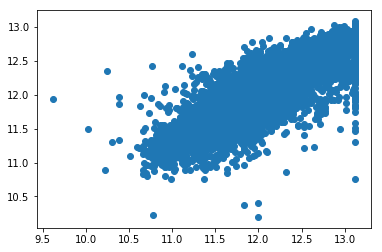

In [97]:
plt.scatter(y_test, y_pred)

In [98]:
regressor.coef_

array([-0.18103499, -0.18193998,  0.03260925,  0.12421058,  0.10605335,
       -0.33264947,  0.11103346,  0.8366425 , -0.01103205, -0.32664397,
        0.43605246, -0.03842756, -0.05994888])

In [99]:
print(f"Linear regression R-squared {lin_reg.score(X_test, y_test):.3f}")

Linear regression R-squared 0.638


## Regression tree

In [83]:
from sklearn.tree import DecisionTreeRegressor

In [100]:
tree_reg = DecisionTreeRegressor()

In [101]:
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [102]:
y_pred = tree_reg.predict(X_test)

In [104]:
print(f"Regression tree R-squared {tree_reg.score(X_test, y_test):.3f}")

Regression tree R-squared 0.668


In [107]:
# Checking tree depth
tree_reg.get_depth()

36

In [108]:
tree_reg_25 = DecisionTreeRegressor(max_depth= 25)

In [110]:
tree_reg_25.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=25)

In [111]:
y_pred = tree_reg_25.predict(X_test)

In [113]:
print(f"Regression tree with max depth=25 R-squared {tree_reg_25.score(X_test, y_test):.3f}")

Regression tree with max depth=25 R-squared 0.669


In [114]:
tree_reg_15 = DecisionTreeRegressor(max_depth= 15)

In [115]:
tree_reg_15.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15)

In [116]:
y_pred = tree_reg_15.predict(X_test)

In [117]:
print(f"Regression tree with max depth=15 R-squared {tree_reg_15.score(X_test, y_test):.3f}")

Regression tree with max depth=15 R-squared 0.698


In [118]:
tree_reg_10 = DecisionTreeRegressor(max_depth= 10)

In [119]:
tree_reg_10.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [120]:
y_pred = tree_reg_10.predict(X_test)

In [121]:
print(f"Regression tree with max depth=10 R-squared {tree_reg_10.score(X_test, y_test):.3f}")

Regression tree with max depth=10 R-squared 0.720


In [154]:
tree_reg_8 = DecisionTreeRegressor(max_depth= 8)

In [155]:
tree_reg_8.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [156]:
y_pred = tree_reg_8.predict(X_test)

In [157]:
print(f"Regression tree with max depth=8 R-squared {tree_reg_8.score(X_test, y_test):.3f}")

Regression tree with max depth=8 R-squared 0.731


In [161]:
tree_reg_7 = DecisionTreeRegressor(max_depth= 7)

In [162]:
tree_reg_7.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7)

In [163]:
y_pred = tree_reg_7.predict(X_test)

In [164]:
print(f"Regression tree with max depth=7 R-squared {tree_reg_7.score(X_test, y_test):.3f}")

Regression tree with max depth=7 R-squared 0.713


In [166]:
print(f"Regression tree with max depth=36  R-squared {tree_reg.score(X_test, y_test):.3f}")
print(f"Regression tree with max depth=25  R-squared {tree_reg_25.score(X_test, y_test):.3f}")
print(f"Regression tree with max depth=15  R-squared {tree_reg_15.score(X_test, y_test):.3f}")
print(f"Regression tree with max depth=10  R-squared {tree_reg_10.score(X_test, y_test):.3f}")
print(f"Regression tree with max depth=8   R-squared {tree_reg_8.score(X_test, y_test):.3f}")
print(f"Regression tree with max depth=7   R-squared {tree_reg_7.score(X_test, y_test):.3f}")

Regression tree with max depth=36  R-squared 0.667
Regression tree with max depth=25  R-squared 0.669
Regression tree with max depth=15  R-squared 0.698
Regression tree with max depth=10  R-squared 0.720
Regression tree with max depth=8   R-squared 0.731
Regression tree with max depth=7   R-squared 0.713


Investigating overfitting problem by checking R-squared values on the Train set.

In [167]:
print(f"Regression tree with max depth=36  R-squared {tree_reg.score(X_train, y_train):.3f}")
print(f"Regression tree with max depth=25  R-squared {tree_reg_25.score(X_train, y_train):.3f}")
print(f"Regression tree with max depth=15  R-squared {tree_reg_15.score(X_train, y_train):.3f}")
print(f"Regression tree with max depth=10  R-squared {tree_reg_10.score(X_train, y_train):.3f}")
print(f"Regression tree with max depth=8   R-squared {tree_reg_8.score(X_train, y_train):.3f}")
print(f"Regression tree with max depth=7   R-squared {tree_reg_7.score(X_train, y_train):.3f}")

Regression tree with max depth=36  R-squared 1.000
Regression tree with max depth=25  R-squared 1.000
Regression tree with max depth=15  R-squared 0.956
Regression tree with max depth=10  R-squared 0.840
Regression tree with max depth=8   R-squared 0.778
Regression tree with max depth=7   R-squared 0.748


The highest values of max-depth lead to an overfitting problem, as the model, has much higher performance on the Train set. The difference of R-squared between Test and Train set diminishes when the max depth value is set to around 8.

## Random forest 

In [168]:
from sklearn.ensemble import RandomForestRegressor

In [189]:
forest_reg = RandomForestRegressor(oob_score = True, n_estimators= 100)

In [190]:
forest_reg.fit(X_train, y_train)

RandomForestRegressor(oob_score=True)

In [191]:
y_pred = forest_reg.predict(X_test)

In [192]:
print(f"Random forest R-squared {forest_reg.score(X_test, y_test):.3f}")

Random forest R-squared 0.829


In [193]:
(f"Random forest R-squared {forest_reg.score(X_train, y_train):.3f}")

'Random forest R-squared 0.976'

## Conclusion

It turns out that the Random Forest is the best model to fit and predict housing data. It got the highest values of R-squared. 